In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
df=pd.read_csv(r"C:\Users\abc\Downloads\advertising (1).csv")
df.head()



,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

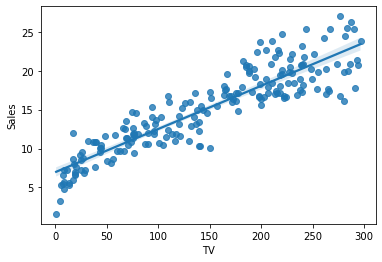

In [10]:
sns.regplot(x="TV",y="Sales",data=df)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

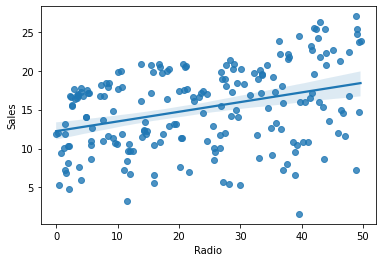

In [11]:
sns.regplot(x="Radio",y="Sales",data=df)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

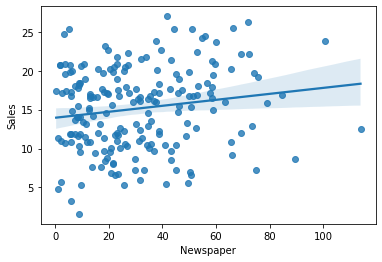

In [12]:
sns.regplot(x="Newspaper",y="Sales",data=df)

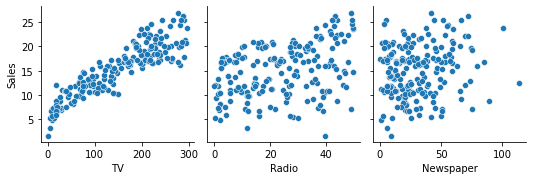

In [13]:
sns.pairplot(data=df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'])

In [14]:
df.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [15]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [32]:
X=df["TV"]
y=df["Sales"]

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [62]:
X_train_sm=sm.add_constant(X_train)

In [63]:
y_test.shape


(60,)

In [35]:
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [37]:
lr=sm.OLS(y_train,X_train_sm).fit()

In [38]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           1.52e-52
Time:                        13:09:26   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

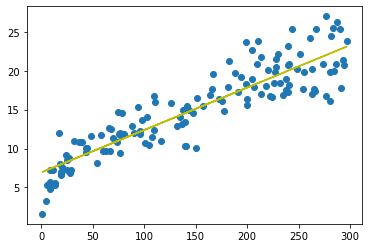

In [43]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.94+0.0545*X_train,"y")
plt.show()

In [44]:
y_train_predict=lr.predict(X_train_sm)

In [45]:
res=y_train-y_predict

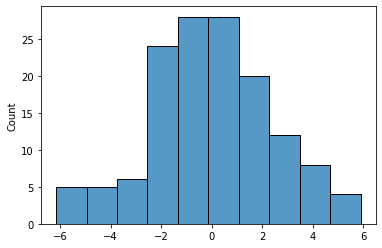

In [49]:
plt.figure()
sns.histplot(res)
plt.show()

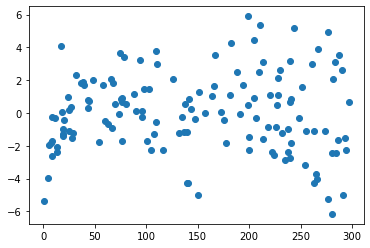

In [50]:
plt.scatter(X_train,res)
plt.show()

## model build on prediction data


In [51]:
X_test_sm=sm.add_constant(X_test)

In [65]:
y_pred=lr.predict(X_test_sm)

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### mean squared error


In [67]:
y_test.shape



(60,)

In [68]:
y_predict.shape


(140,)

In [69]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966233

## r2 score


In [70]:
r2=r2_score(y_test,y_pred)

In [71]:
r2

0.7921031601245658

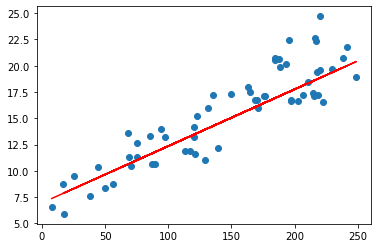

In [72]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()
